In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Наложение и удаление шума

In [ ]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

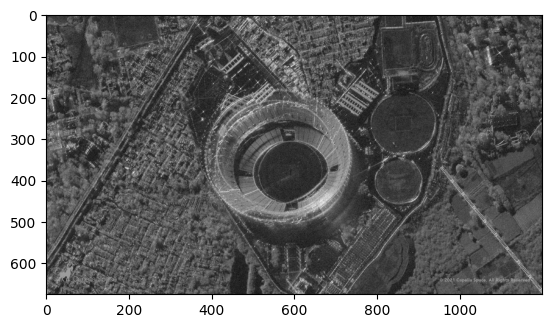

In [ ]:
plt.imshow(image_gray, cmap="gray")

In [ ]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,  16,   0, ..., 111,   0,  80],
       [  1, 104,  68, ...,   0, 103,   0],
       [  0,   0,  51, ...,   0,   0, 145],
       ...,
       [  0,   0,  39, ..., 255,   0,  15],
       [  0,  34,   0, ...,   0,   5, 135],
       [160, 204,   0, ...,  21,   0, 109]], dtype=uint8)

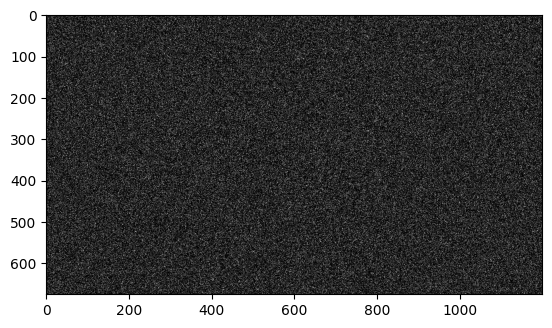

In [ ]:
plt.imshow(noise_gauss, cmap="gray")

In [ ]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [ ]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [ ]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

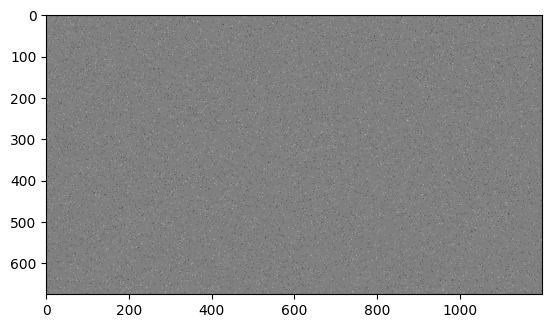

In [ ]:
plt.imshow(bg_image, cmap="gray")

In [ ]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

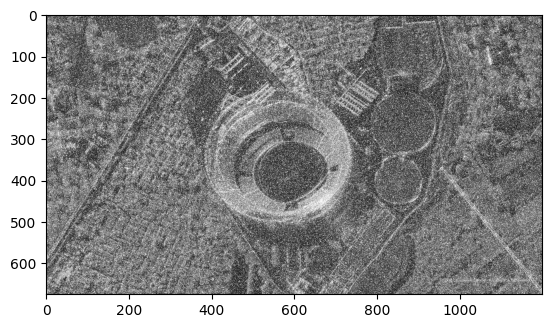

In [ ]:
plt.imshow(image_noise_gauss, cmap="gray")

In [ ]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4230.673058024691 0.1869926680003536


In [ ]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [ ]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [ ]:
print(mse_gauss_median, ssim_gauss_median)

1038.0453432098766 0.4282430571563417


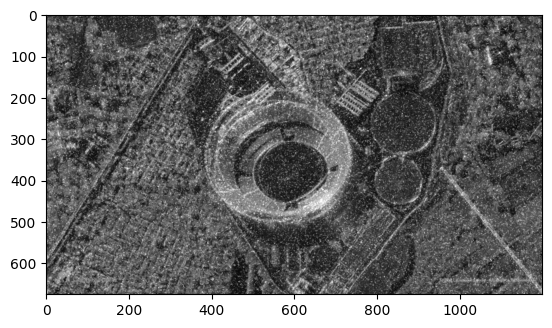

In [ ]:
plt.imshow(image_gauss_median, cmap="gray")

In [ ]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

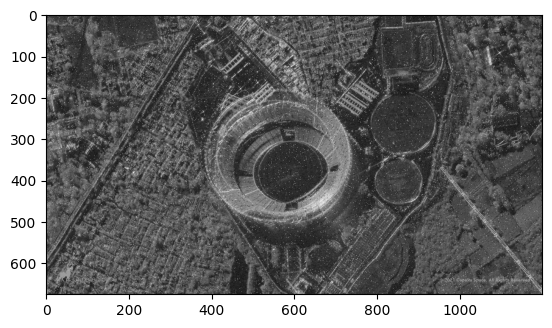

In [ ]:
plt.imshow(image_sp, cmap="gray")

In [ ]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

385.5071814814815 0.7214024228454586


In [ ]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [ ]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.69172839506173 0.8162161737513401


# Другие типы фильтров

In [ ]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [ ]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [ ]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [ ]:
import math

def geom(a):
    prod = 1
    for i in range(a.shape[0]):
        prod1 = 1
        for j in range(a.shape[1]):
            prod1 *= a[i,j]
        prod1 = math.pow(prod1, 1.0/9.0)
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res

res = proc(image_noise_gauss, geom)


/tmp/ipython-input-3044326922.py:8: RuntimeWarning: overflow encountered in scalar multiply
  prod1 *= a[i,j]


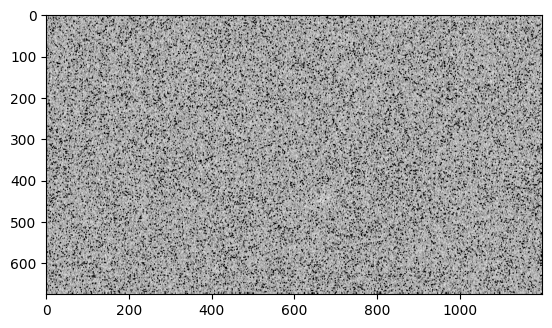

In [ ]:
plt.imshow(res, cmap="gray")

In [ ]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

6551.976648148148 0.02746126776511091



# 2D свертка

In [ ]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [ ]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [ ]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [ ]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl)

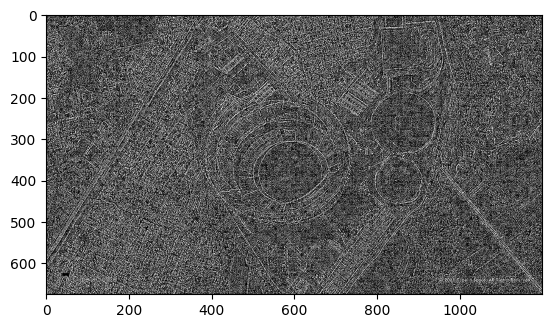

In [ ]:
plt.imshow(image_lapl, cmap="gray")

# Домашнее задание

In [ ]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

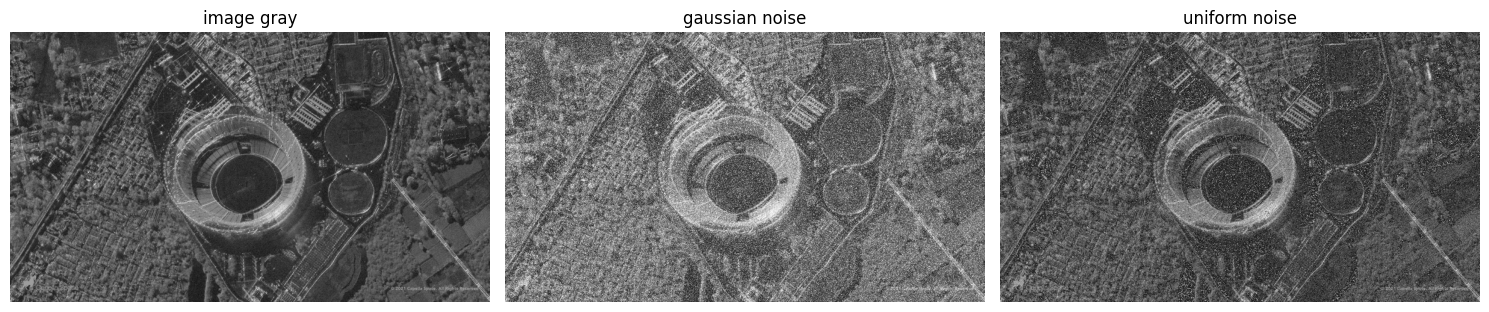

-- Filters results: --
Gaussian 3x3 sigma=0: MSE=1904.31, SSIM=0.4408
Gaussian 5x5 sigma=0: MSE=1765.33, SSIM=0.4866
Gaussian 7x7 sigma=0: MSE=1722.05, SSIM=0.4930
Gaussian 3x3 sigma=1: MSE=1870.63, SSIM=0.4494
Gaussian 3x3 sigma=2: MSE=1851.59, SSIM=0.4455
Gaussian 5x5 sigma=1: MSE=1779.06, SSIM=0.4825
Gaussian 5x5 sigma=2: MSE=1737.88, SSIM=0.4733
Gaussian 7x7 sigma=1: MSE=1772.37, SSIM=0.4848
Gaussian 7x7 sigma=2: MSE=1727.39, SSIM=0.4682
Median 3x3: MSE=1036.65, SSIM=0.4286
Median 5x5: MSE=702.91, SSIM=0.4686
Median 7x7: MSE=678.96, SSIM=0.4325
Bilateral d=9 sigma=25: MSE=3790.71, SSIM=0.1816
Bilateral d=9 sigma=75: MSE=1841.43, SSIM=0.3143
Bilateral d=15 sigma=100: MSE=1585.75, SSIM=0.3376
NLM h=10: MSE=4235.77, SSIM=0.1873
NLM h=20: MSE=4231.90, SSIM=0.1877
NLM h=30: MSE=2946.48, SSIM=0.2535


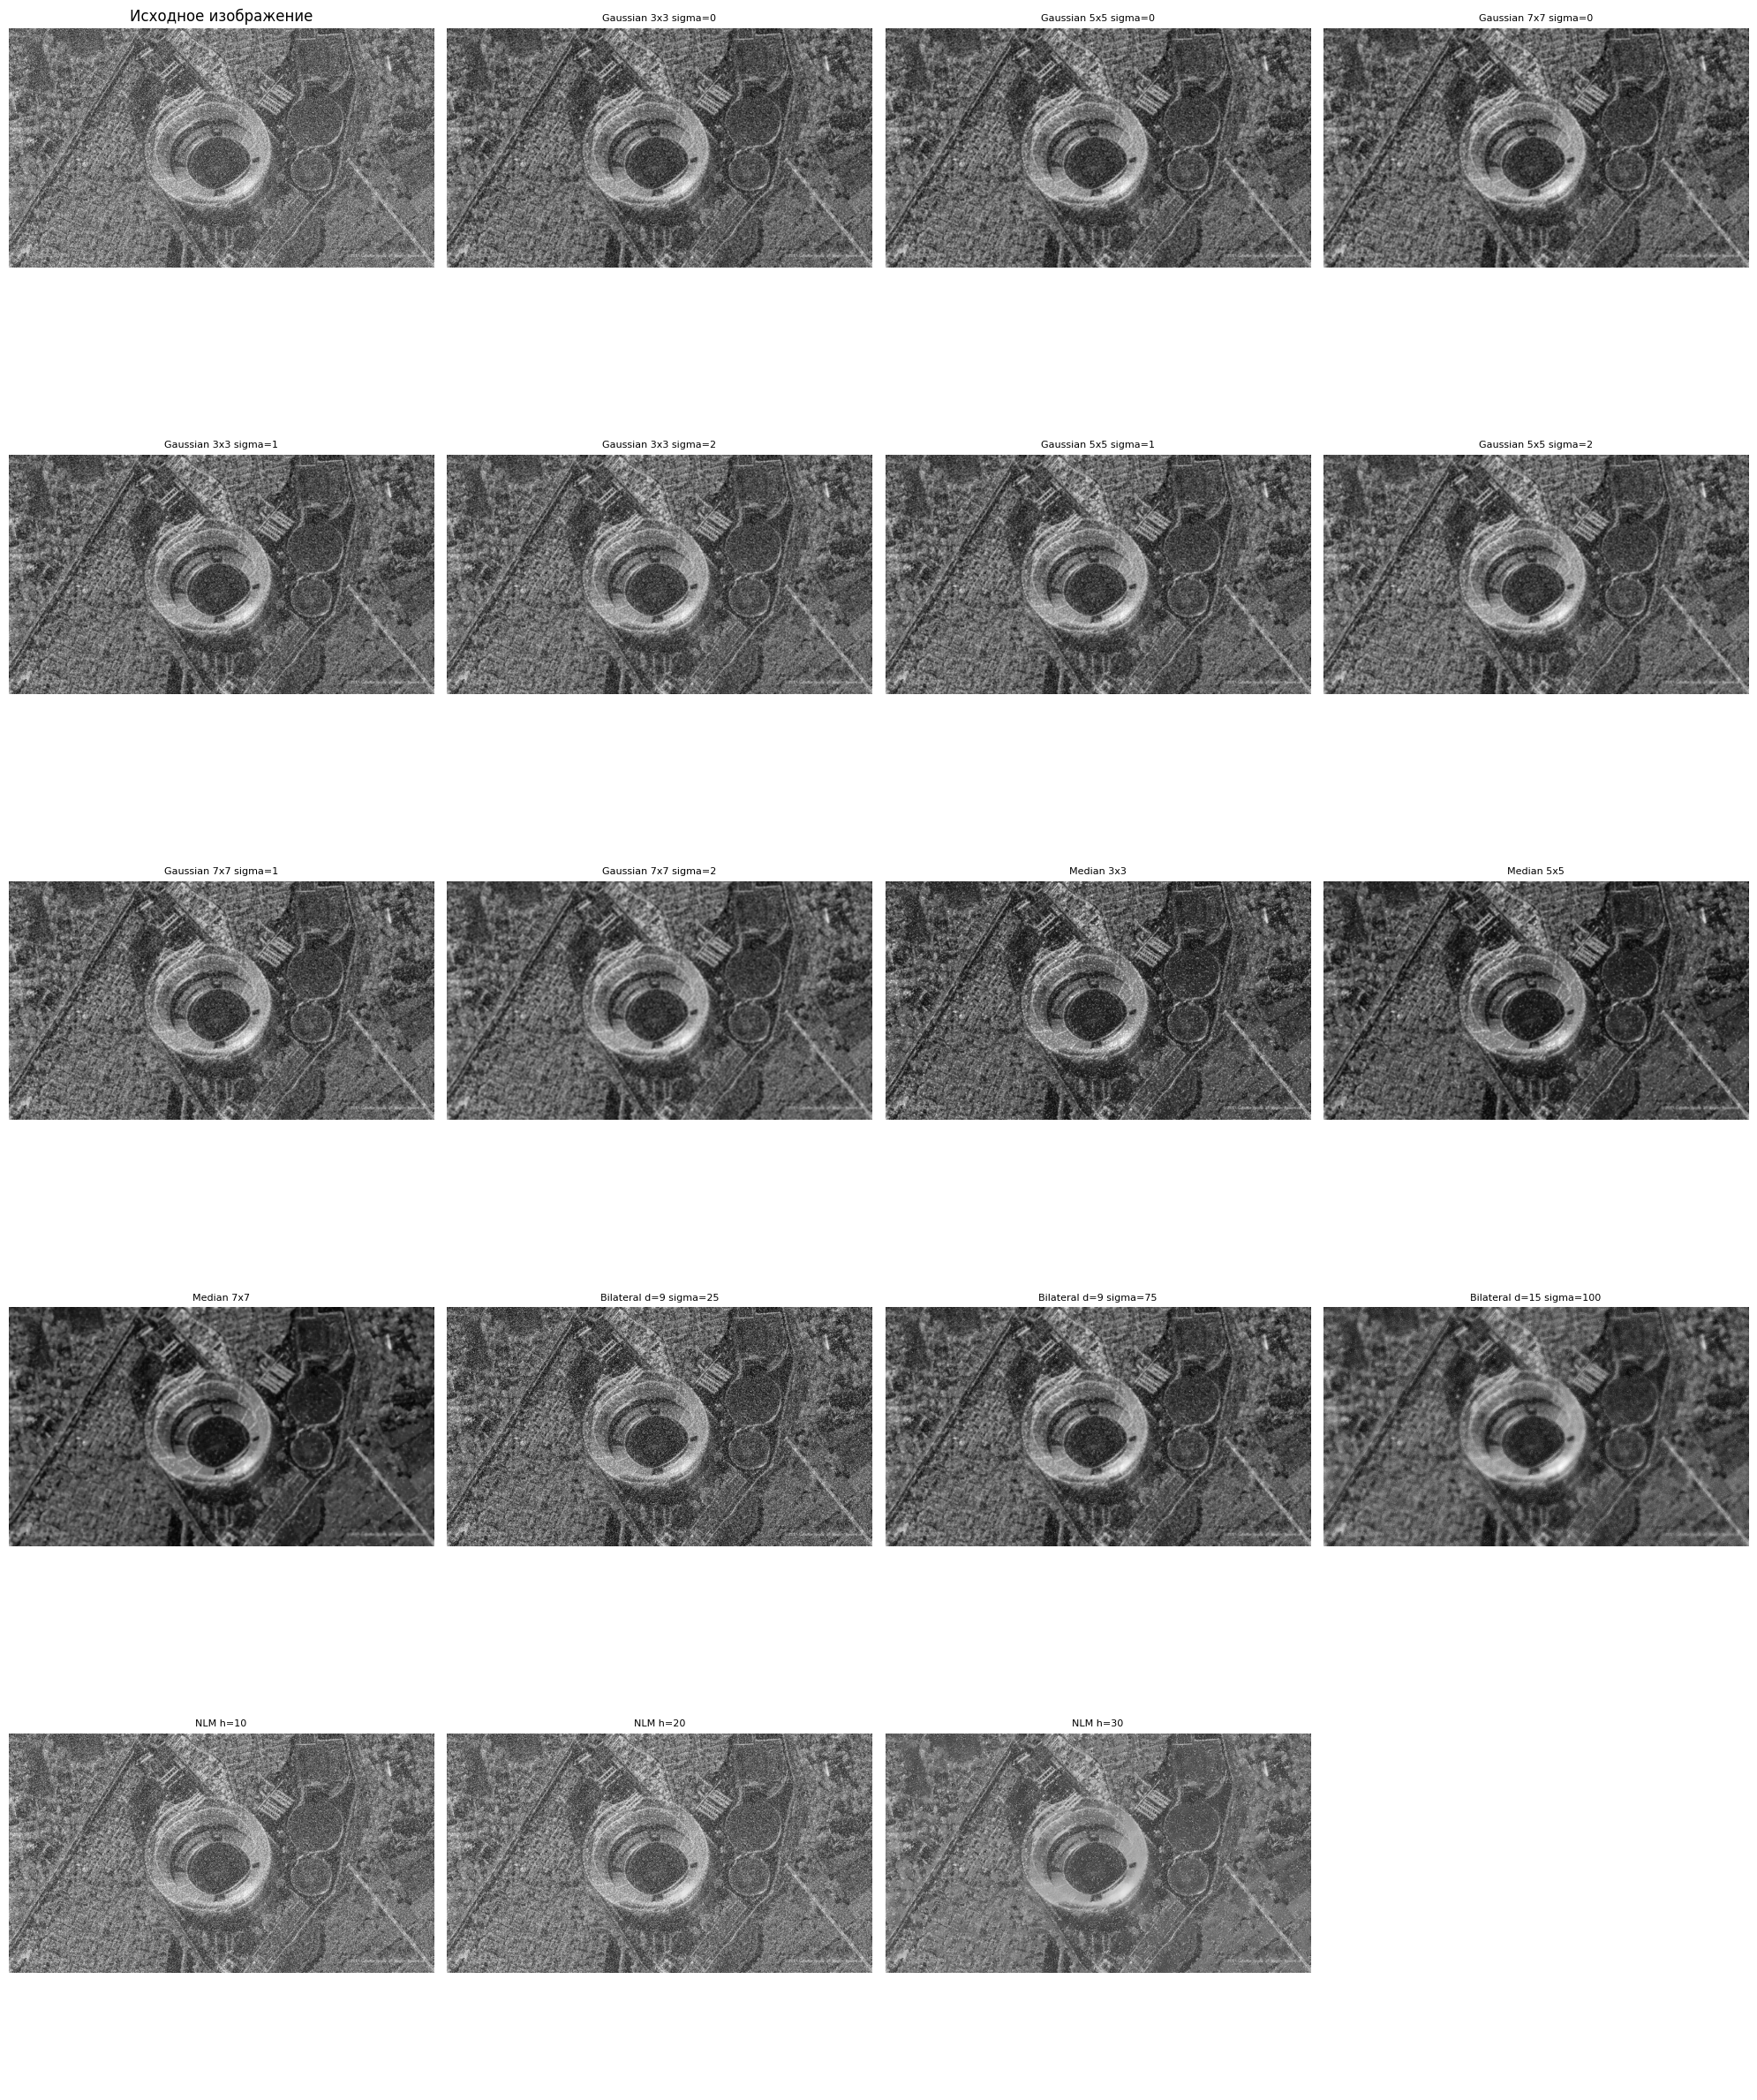

Лучший фильтр по MSE:
Название: Median 7x7
MSE: 678.96 (чем меньше, тем лучше)
SSIM: 0.4325

Лучший фильтр по SSIM:
Название: Gaussian 7x7 sigma=0
MSE: 1722.05
SSIM: 0.4930 (чем ближе к 1, тем лучше)


(np.float64(-0.5), np.float64(1199.5), np.float64(674.5), np.float64(-0.5))

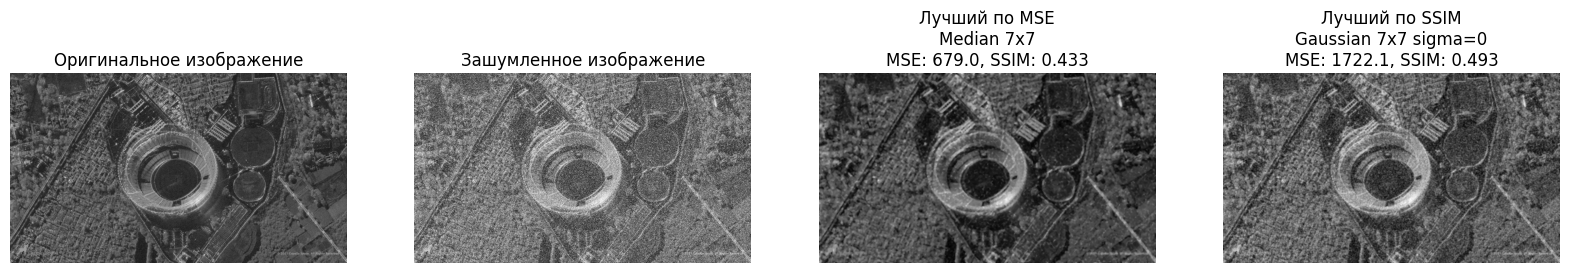

In [39]:
# Зашумить изображение при помощи шума гаусса, постоянного шума.
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
noise_gauss_image = cv2.add(image_gray, noise_gauss)

low = -50
high = 50
noise_uniform = np.random.uniform(low, high, image_gray.shape).astype(np.uint8)
noise_uniform_image = np.clip(image_gray.astype(np.uint8) + noise_uniform, 0, 255).astype(np.uint8)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1); plt.imshow(image_gray, cmap='gray'); plt.title('Серое изображение'); plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(noise_gauss_image, cmap='gray'); plt.title('Гауссовый шум'); plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(noise_uniform_image, cmap='gray'); plt.title('Постоянный шум'); plt.axis('off')
plt.tight_layout()
plt.show()

# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.

def filter_test(noisy_image, clean_image):
    filters_to_test = [
        ('Gaussian 3x3 sigma=0', cv2.GaussianBlur(noisy_image, (3, 3), 0)),
        ('Gaussian 5x5 sigma=0', cv2.GaussianBlur(noisy_image, (5, 5), 0)),
        ('Gaussian 7x7 sigma=0', cv2.GaussianBlur(noisy_image, (7, 7), 0)),
        ('Gaussian 3x3 sigma=1', cv2.GaussianBlur(noisy_image, (3, 3), 1)),
        ('Gaussian 3x3 sigma=2', cv2.GaussianBlur(noisy_image, (3, 3), 2)),
        ('Gaussian 5x5 sigma=1', cv2.GaussianBlur(noisy_image, (5, 5), 1)),
        ('Gaussian 5x5 sigma=2', cv2.GaussianBlur(noisy_image, (5, 5), 2)),
        ('Gaussian 7x7 sigma=1', cv2.GaussianBlur(noisy_image, (7, 7), 1)),
        ('Gaussian 7x7 sigma=2', cv2.GaussianBlur(noisy_image, (7, 7), 2)),

        ('Median 3x3', cv2.medianBlur(noisy_image, 3)),
        ('Median 5x5', cv2.medianBlur(noisy_image, 5)),
        ('Median 7x7', cv2.medianBlur(noisy_image, 7)),

        ('Bilateral d=9 sigma=25', cv2.bilateralFilter(noisy_image, 9, 25, 25)),
        ('Bilateral d=9 sigma=75', cv2.bilateralFilter(noisy_image, 9, 75, 75)),
        ('Bilateral d=15 sigma=100', cv2.bilateralFilter(noisy_image, 15, 100, 100)),

        ('NLM h=10', cv2.fastNlMeansDenoising(noisy_image, h=10)),
        ('NLM h=20', cv2.fastNlMeansDenoising(noisy_image, h=20)),
        ('NLM h=30', cv2.fastNlMeansDenoising(noisy_image, h=30))
    ]
    results = {}

    print("Результаты фильтров")

    for filter_name, filtered_image in filters_to_test:
        mse = mean_squared_error(clean_image, filtered_image)
        ssim = structural_similarity(clean_image, filtered_image)

        print(f"{filter_name}: MSE={mse:.2f}, SSIM={ssim:.4f}")

        results[filter_name] = {
            'image': filtered_image,
            'mse': mse,
            'ssim': ssim
        }
    return results

def visualize(noisy_image, results):
    n_filters = len(results)
    n_cols = 4
    n_rows = (n_filters + n_cols) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    axes = axes.flatten()

    axes[0].imshow(noisy_image, cmap='gray')
    axes[0].set_title('Исходное изображение')
    axes[0].axis('off')

    for idx, (filter_name, result) in enumerate(results.items(), 1):
        if idx < len(axes):
            axes[idx].imshow(result['image'], cmap='gray')
            axes[idx].set_title(f'{filter_name}', fontsize=8)
            axes[idx].axis('off')

    for idx in range(len(results) + 1, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

results = filter_test(noise_gauss_image, image_gray)
visualize(noise_gauss_image, results)

# Выяснить, какой фильтр показал лучший результат фильтрации шума.
def find_best_filter_mse(clean_image, results):
    best_filter = None

    for filter_name, result in results.items():
        mse = result['mse']
        ssim = result['ssim']

        if best_filter is None or mse < best_filter['mse']:
            best_filter = {
                'name': filter_name,
                'image': result['image'],
                'mse': mse,
                'ssim': ssim
            }

        elif mse == best_filter['mse'] and ssim > best_filter['ssim']:
            best_filter = {
                'name': filter_name,
                'image': result['image'],
                'mse': mse,
                'ssim': ssim
            }

    return best_filter

def find_best_filter_ssim(clean_image, results):
    best_filter = None

    for filter_name, result in results.items():
        mse = result['mse']
        ssim = result['ssim']

        if best_filter is None or ssim > best_filter['ssim']:
            best_filter = {
                'name': filter_name,
                'image': result['image'],
                'mse': mse,
                'ssim': ssim
            }

        elif ssim == best_filter['ssim'] and mse < best_filter['mse']:
            best_filter = {
                'name': filter_name,
                'image': result['image'],
                'mse': mse,
                'ssim': ssim
            }

    return best_filter

best_mse = find_best_filter_mse(image_gray, results)
best_ssim = find_best_filter_ssim(image_gray, results)

print("Лучший фильтр по MSE:")
print(f"Название: {best_mse['name']}")
print(f"MSE: {best_mse['mse']:.2f} (чем меньше, тем лучше)")
print(f"SSIM: {best_mse['ssim']:.4f}")

print("\nЛучший фильтр по SSIM:")
print(f"Название: {best_ssim['name']}")
print(f"MSE: {best_ssim['mse']:.2f}")
print(f"SSIM: {best_ssim['ssim']:.4f} (чем ближе к 1, тем лучше)")

plt.figure(figsize=(20, 15))

plt.subplot(1, 4, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Оригинальное изображение')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(noise_gauss_image, cmap='gray')
plt.title('Зашумленное изображение')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(best_mse['image'], cmap='gray')
plt.title(f'Лучший по MSE\n{best_mse["name"]}\nMSE: {best_mse["mse"]:.1f}, SSIM: {best_mse["ssim"]:.3f}')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(best_ssim['image'], cmap='gray')
plt.title(f'Лучший по SSIM\n{best_ssim["name"]}\nMSE: {best_ssim["mse"]:.1f}, SSIM: {best_ssim["ssim"]:.3f}')
plt.axis('off')